In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [10]:
N = int(1e4)
anos_simul = 6
investimento_inicial = 400000
saldo_solar = np.zeros((N, anos_simul))
saldo_poupanca = np.zeros((N, anos_simul))
tarifa = np.zeros((N, anos_simul))
consumo_anual = 7860 * 12

tarifa_zero = 0.7

for n in np.arange(N):
    #Inflação gaussiana com média em 5% e desv. pad em 1%
    inflation = np.random.randn(anos_simul) * 0.01 + 0.04
    tarifa[n, 0] = 0.69
    saldo_solar[n, 0] = 0
    saldo_poupanca[n, 0] = investimento_inicial  
    for i in range(1, anos_simul):
        current_inflation = 1 + inflation[i - 1]
        rendimento_utopico = 1 + 3 * inflation[i - 1]
        tarifa[n, i] = tarifa[n, i - 1] * current_inflation
        saldo_poupanca[n, i] = saldo_poupanca[n, i - 1] * rendimento_utopico
        saldo_solar[n, i] = consumo_anual * tarifa[n, i] + saldo_solar[n, i - 1] * rendimento_utopico

In [11]:
saldo_solar_final = np.array([np.mean(ano) for ano in saldo_solar.T])
saldo_poupanca_final = np.array([np.mean(ano) for ano in saldo_poupanca.T])

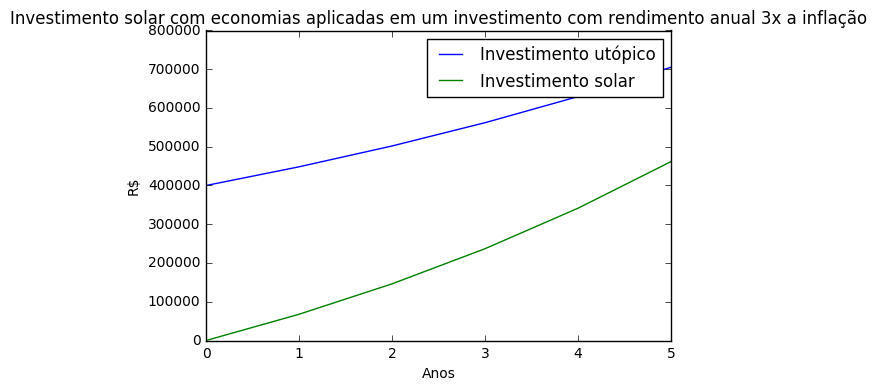

In [12]:
plt.title("Investimento solar com economias aplicadas em um investimento com rendimento anual 3x a inflação")
plt.plot(saldo_poupanca_final, label="Investimento utópico")
plt.plot(saldo_solar_final, label="Investimento solar")
plt.ylabel("R$")
plt.xlabel("Anos")
plt.legend()

In [24]:
saldo_solar[0]

array([      0.        ,   67603.42077641,  140598.26261634,
        232266.83239926,  333982.5732808 ,  449173.83672867])